In [9]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
df = pd.read_csv('avocado.csv', index_col = 'Date')

df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
drop_columns = ['Unnamed: 0', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type']
avo_df = df.drop(drop_columns, axis=1)

avo_df.head()

,AveragePrice,Total Volume,year,region
Date,,,,
2015-12-27,1.33,64236.62,2015,Albany
2015-12-20,1.35,54876.98,2015,Albany
2015-12-13,0.93,118220.22,2015,Albany
2015-12-06,1.08,78992.15,2015,Albany
2015-11-29,1.28,51039.60,2015,Albany


In [14]:
avo_df['AveragePrice'].describe() 

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

In [20]:
print('Median price:' , avo_df['AveragePrice'].median())

Median price: 1.37


(array([  64.,  267.,  860., 1772., 2409., 2415., 2191., 2315., 1931.,
        1481., 1051.,  621.,  352.,  246.,   92.,   85.,   47.,   39.,
           8.,    3.]),
 array([0.44  , 0.5805, 0.721 , 0.8615, 1.002 , 1.1425, 1.283 , 1.4235,
        1.564 , 1.7045, 1.845 , 1.9855, 2.126 , 2.2665, 2.407 , 2.5475,
        2.688 , 2.8285, 2.969 , 3.1095, 3.25  ]),
 <a list of 20 Patch objects>)

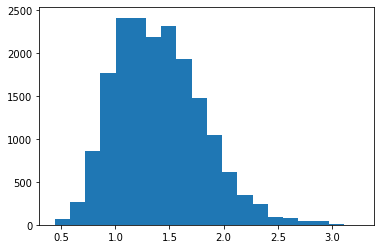

In [16]:
plt.hist(avo_df["AveragePrice"], bins=20)

In [23]:
regions = avo_df.region.unique()
regions

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [24]:
group_by_region = avo_df.groupby(by=['region'])
avo_df_avg = group_by_region.mean()
avo_df_avg = avo_df_avg.drop(['year'], axis=1)

avo_df_avg.head()

,AveragePrice,Total Volume
region,,
Albany,1.561036,47537.869734
Atlanta,1.337959,262145.322041
BaltimoreWashington,1.534231,398561.891479
Boise,1.348136,42642.567308
Boston,1.530888,287792.854527


In [31]:
from geopy.geocoders import Bing
from geopy.extra.rate_limiter import RateLimiter
geolocator = Bing(api_key='ApxLuramuz441u7DhIjLsoVIxufcTWRa09sKB1jr5ZKu55P02CCvIPAu_VSHwKQo', timeout=30)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=2)
regions_dict = {i : geolocator.geocode(i) for i in regions}

In [42]:
regions_df = pd.DataFrame(regions_dict)
regions_df_melted = regions_df.iloc[1:2,:].melt()
regions_df_melted.columns = ['region', 'co-ordinates']

regions_df_melted.head()

,region,co-ordinates
0,Albany,"(42.65172576904297, -73.75509643554688)"
1,Atlanta,"(33.7485466003418, -84.3915023803711)"
2,BaltimoreWashington,"(39.175262451171875, -76.67152404785156)"
3,Boise,"(43.61579132080078, -116.20157623291016)"
4,Boston,"(42.35899353027344, -71.05863189697266)"


In [45]:
df = pd.merge(avo_df_avg, regions_df_melted, left_on='region', right_on='region')

df.head()

,region,AveragePrice,Total Volume,co-ordinates
0,Albany,1.561036,47537.869734,"(42.65172576904297, -73.75509643554688)"
1,Atlanta,1.337959,262145.322041,"(33.7485466003418, -84.3915023803711)"
2,BaltimoreWashington,1.534231,398561.891479,"(39.175262451171875, -76.67152404785156)"
3,Boise,1.348136,42642.567308,"(43.61579132080078, -116.20157623291016)"
4,Boston,1.530888,287792.854527,"(42.35899353027344, -71.05863189697266)"
